## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/tommy/train'
valid_path = '/content/drive/MyDrive/tommy/valid'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/tommy/valid')
print(folders)

['/content/drive/MyDrive/tommy/valid']


In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(10, activation='softmax')(x)
print(prediction)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_5/Softmax:0', description="created by layer 'dense_5'")


In [ ]:

# view the structure of the model
model.summary()


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tommy/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18344 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/tommy/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4584 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-55-bd47de4ae9d9>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/3
574/574 [==============================] - 5431s 9s/step - loss: 2.0465 - accuracy: 0.3725 - val_loss: 2.2124 - val_accuracy: 0.3763
Epoch 2/3
574/574 [==============================] - 236s 410ms/step - loss: 1.9359 - accuracy: 0.4484 - val_loss: 2.5501 - val_accuracy: 0.4500
Epoch 3/3
574/574 [==============================] - 235s 409ms/step - loss: 1.7622 - accuracy: 0.4977 - val_loss: 1.6981 - val_accuracy: 0.5100


In [ ]:
import matplotlib.pyplot as plt


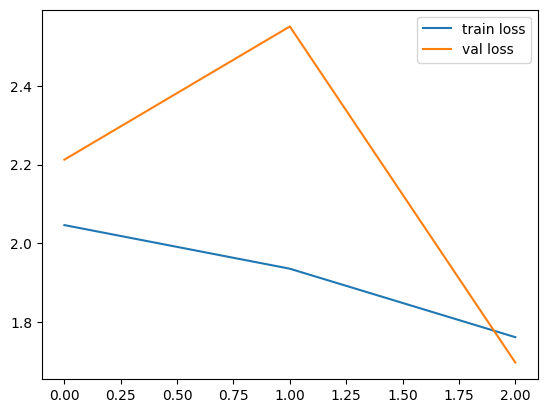

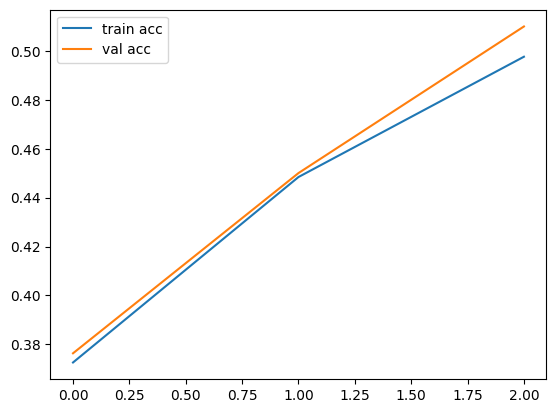

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


144/144 [==============================] - 15s 100ms/step


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([4, 4, 2, ..., 9, 9, 7])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
from PIL import Image

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('/content/drive/MyDrive/tommy/model_resnet50.h5')

# Load the image you want to make a prediction on
img=image.load_img('/content/drive/MyDrive/tommy/sample/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG',target_size=(224,224))



# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to fit the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Scale the image pixels by 255
img_array /= 255.

# Make a prediction
predictions = model.predict(img_array)
confidence = np.max(predictions[0])

# Get the index of the highest probability
predicted_index = np.argmax(predictions[0])

print(f"Predicted index: {predicted_index}")


1/1 [==============================] - 1s 918ms/step
Predicted index: 9


In [ ]:
class_names = ['Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Bacterial_spot']  # replace with your class names
predicted_class = class_names[predicted_index]
print(f"Predicted class: {predicted_class} with an confidence of {confidence*100}")


Predicted class: Tomato___Bacterial_spot with an confidence of 99.85970854759216


In [ ]:
import os

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/tom/model','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
img=image.load_img('/content/drive/MyDrive/tommy/sample/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[129., 123., 127.],
        [169., 163., 167.],
        [111., 105., 109.],
        ...,
        [139., 134., 140.],
        [159., 154., 160.],
        [159., 154., 160.]],

       [[140., 134., 138.],
        [137., 131., 135.],
        [129., 123., 127.],
        ...,
        [148., 143., 149.],
        [135., 130., 136.],
        [140., 135., 141.]],

       [[120., 114., 118.],
        [142., 136., 140.],
        [161., 155., 159.],
        ...,
        [171., 166., 172.],
        [154., 149., 155.],
        [152., 147., 153.]],

       ...,

       [[ 63.,  62.,  67.],
        [ 77.,  76.,  81.],
        [ 71.,  70.,  75.],
        ...,
        [ 59.,  60.,  64.],
        [ 50.,  51.,  55.],
        [ 69.,  70.,  74.]],

       [[ 61.,  60.,  65.],
        [ 69.,  68.,  73.],
        [ 59.,  58.,  63.],
        ...,
        [ 89.,  90.,  94.],
        [ 81.,  82.,  86.],
        [ 65.,  66.,  70.]],

       [[ 68.,  67.,  72.],
        [108., 107., 112.],
        [ 60.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[6.1833823e-29, 1.4351499e-14, 2.7151974e-19, 1.2638008e-21,
        3.6500389e-24, 3.1282770e-25, 6.1413225e-08, 8.1866624e-34,
        6.3759849e-08, 9.9999976e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'